# EETBS Project                      
### (PART 1/2)

#### In this project we want to predict the room internal temperature of the next 15 min, 30 min and 1 hour and the room occupancy
#### This part is dedicated to internal temperature prediction

#### We first import the useful modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib notebook

#### After we have chosen the suitable datatset for our scope, we import it

In [2]:
project_folder = "/Users/giuliamoret/Google Drive/Progetto Building"
file_name = "Dataset NOSTRO.csv"
path_file = os.path.join(project_folder,file_name)

In [3]:
DF_main = pd.read_csv(path_file, sep=";" , index_col=0)

In [4]:
DF_main.head()

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
13/03/12 11:45,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
13/03/12 12:00,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
13/03/12 12:15,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
13/03/12 12:30,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
13/03/12 12:45,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0


#### We decide to construct a data frame made up of only the columns to which we are interested 

In [5]:
DATASET = DF_main[["4:Temperature_Habitacion_Sensor","22:Temperature_Exterior_Sensor","18:Meteo_Exterior_Piranometro","7:CO2_Habitacion_Sensor","9:Humedad_Habitacion_Sensor","11:Lighting_Habitacion_Sensor"]]
DATASET.loc[DATASET.loc[:,"18:Meteo_Exterior_Piranometro"]<0,"18:Meteo_Exterior_Piranometro"]=0

/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### We have changed the negative values of the irradiance into zero

In [76]:
DATASET.head(100)

,4:Temperature_Habitacion_Sensor,22:Temperature_Exterior_Sensor,18:Meteo_Exterior_Piranometro,7:CO2_Habitacion_Sensor,9:Humedad_Habitacion_Sensor,11:Lighting_Habitacion_Sensor
13/03/12 11:45,17.8275,18.1150,758.88000,221.920,42.4150,113.5200
13/03/12 12:00,18.1207,18.4147,762.06900,220.363,42.2453,113.6050
13/03/12 12:15,18.4367,18.8533,766.25100,218.933,42.2267,113.6000
13/03/12 12:30,18.7513,19.2907,766.03700,217.045,42.0987,113.3440
13/03/12 12:45,19.0414,19.7400,762.74300,216.080,42.0686,113.0340
13/03/12 13:00,19.2773,20.1660,752.68300,216.011,42.0347,113.6000
13/03/12 13:15,19.5367,20.5660,740.94900,215.829,41.9947,112.9810
13/03/12 13:30,19.7307,20.8427,721.10900,215.296,41.9947,111.2590
13/03/12 13:45,19.9693,21.2040,699.39200,214.549,42.1253,83.3547
13/03/12 14:00,20.1407,21.5227,677.67500,213.909,42.0427,83.3600


#### Time related features

In [6]:
old_index_main = DATASET.index  
new_index_main = pd.to_datetime(old_index_main,dayfirst=True)
DATASET.index = new_index_main
DATASET.head()

,4:Temperature_Habitacion_Sensor,22:Temperature_Exterior_Sensor,18:Meteo_Exterior_Piranometro,7:CO2_Habitacion_Sensor,9:Humedad_Habitacion_Sensor,11:Lighting_Habitacion_Sensor
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034


#### Renaming columns

In [7]:
DATASET.columns = ["Tin", "Tout", "Sun", "CO2", "Humidity", "Light"]
DATASET.head()

,Tin,Tout,Sun,CO2,Humidity,Light
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034


#### Adding time-related features: extracting the hour and assign it to a column called hour, same with minute

In [8]:
DATASET.loc[:,"hour"] = DATASET.index.hour
DATASET.head()

/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Tin,Tout,Sun,CO2,Humidity,Light,hour
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,11
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,12
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,12
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,12
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,12


In [9]:
DATASET.loc[:,"min"]=DATASET.index.minute
DATASET.head()

/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Tin,Tout,Sun,CO2,Humidity,Light,hour,min
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,11,45
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,12,0
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,12,15
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,12,30
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,12,45


#### But the parameter hour does not represent the continuity of the time : one alternative solution is to use sin(hour) and cos(hour)

In [10]:
DATASET.loc[:,"sin(hour)"] = np.sin(DATASET.index.hour*2*np.pi/24)
DATASET.loc[:,"cos(hour)"] = np.cos(DATASET.index.hour*2*np.pi/24)
DATASET.loc[:,"sin(min)"] = np.sin(DATASET.index.minute*2*np.pi/24)
DATASET.loc[:,"cos(min)"] = np.cos(DATASET.index.minute*2*np.pi/24)
DATASET.head()

,Tin,Tout,Sun,CO2,Humidity,Light,hour,min,sin(hour),cos(hour),sin(min),cos(min)
2012-03-13 11:45:00,17.8275,18.1150,758.880,221.920,42.4150,113.520,11,45,2.588190e-01,-0.965926,-0.707107,7.071068e-01
2012-03-13 12:00:00,18.1207,18.4147,762.069,220.363,42.2453,113.605,12,0,1.224647e-16,-1.000000,0.000000,1.000000e+00
2012-03-13 12:15:00,18.4367,18.8533,766.251,218.933,42.2267,113.600,12,15,1.224647e-16,-1.000000,-0.707107,-7.071068e-01
2012-03-13 12:30:00,18.7513,19.2907,766.037,217.045,42.0987,113.344,12,30,1.224647e-16,-1.000000,1.000000,1.194340e-15
2012-03-13 12:45:00,19.0414,19.7400,762.743,216.080,42.0686,113.034,12,45,1.224647e-16,-1.000000,-0.707107,7.071068e-01


In [11]:
DATASET.loc[:,"month"] = DATASET.index.month
DATASET.loc[:,"dayOfWeek"] = DATASET.index.dayofweek
DATASET.loc[:,"weekOfYear"] = DATASET.index.week
DATASET.head(100)

,Tin,Tout,Sun,CO2,Humidity,Light,hour,min,sin(hour),cos(hour),sin(min),cos(min),month,dayOfWeek,weekOfYear
2012-03-13 11:45:00,17.8275,18.1150,758.88000,221.920,42.4150,113.5200,11,45,2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11
2012-03-13 12:00:00,18.1207,18.4147,762.06900,220.363,42.2453,113.6050,12,0,1.224647e-16,-1.000000e+00,0.000000,1.000000e+00,3,1,11
2012-03-13 12:15:00,18.4367,18.8533,766.25100,218.933,42.2267,113.6000,12,15,1.224647e-16,-1.000000e+00,-0.707107,-7.071068e-01,3,1,11
2012-03-13 12:30:00,18.7513,19.2907,766.03700,217.045,42.0987,113.3440,12,30,1.224647e-16,-1.000000e+00,1.000000,1.194340e-15,3,1,11
2012-03-13 12:45:00,19.0414,19.7400,762.74300,216.080,42.0686,113.0340,12,45,1.224647e-16,-1.000000e+00,-0.707107,7.071068e-01,3,1,11
2012-03-13 13:00:00,19.2773,20.1660,752.68300,216.011,42.0347,113.6000,13,0,-2.588190e-01,-9.659258e-01,0.000000,1.000000e+00,3,1,11
2012-03-13 13:15:00,19.5367,20.5660,740.94900,215.829,41.9947,112.9810,13,15,-2.588190e-01,-9.659258e-01,-0.707107,-7.071068e-01,3,1,11
2012-03-13 13:30:00,19.7307,20.8427,721.10900,215.296,41.9947,111.2590,13,30,-2.588190e-01,-9.659258e-01,1.000000,1.194340e-15,3,1,11
2012-03-13 13:45:00,19.9693,21.2040,699.39200,214.549,42.1253,83.3547,13,45,-2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11
2012-03-13 14:00:00,20.1407,21.5227,677.67500,213.909,42.0427,83.3600,14,0,-5.000000e-01,-8.660254e-01,0.000000,1.000000e+00,3,1,11


In [12]:
def WeekendDetector(day):
    if day == 5 or day == 6:
        weekendLabel = 1
    else:
        weekendLabel = 0
    return weekendLabel

In [13]:
def WorkingHourDetector(hour):
    if hour >= 9 and hour < 12:
        workingHourLabel = 1
    elif hour >= 15 and hour < 19:
        workingHourLabel = 1
    else:
        workingHourLabel = 0
    return workingHourLabel

In [14]:
DATASET.loc[:,"WeekendLabel"]=DATASET.loc[:,"dayOfWeek"].apply(WeekendDetector)
DATASET.loc[:,"WorkingHourLabel"]=DATASET.loc[:,"hour"].apply(WorkingHourDetector)
DATASET.head(100)

,Tin,Tout,Sun,CO2,Humidity,Light,hour,min,sin(hour),cos(hour),sin(min),cos(min),month,dayOfWeek,weekOfYear,WeekendLabel,WorkingHourLabel
2012-03-13 11:45:00,17.8275,18.1150,758.88000,221.920,42.4150,113.5200,11,45,2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11,0,1
2012-03-13 12:00:00,18.1207,18.4147,762.06900,220.363,42.2453,113.6050,12,0,1.224647e-16,-1.000000e+00,0.000000,1.000000e+00,3,1,11,0,0
2012-03-13 12:15:00,18.4367,18.8533,766.25100,218.933,42.2267,113.6000,12,15,1.224647e-16,-1.000000e+00,-0.707107,-7.071068e-01,3,1,11,0,0
2012-03-13 12:30:00,18.7513,19.2907,766.03700,217.045,42.0987,113.3440,12,30,1.224647e-16,-1.000000e+00,1.000000,1.194340e-15,3,1,11,0,0
2012-03-13 12:45:00,19.0414,19.7400,762.74300,216.080,42.0686,113.0340,12,45,1.224647e-16,-1.000000e+00,-0.707107,7.071068e-01,3,1,11,0,0
2012-03-13 13:00:00,19.2773,20.1660,752.68300,216.011,42.0347,113.6000,13,0,-2.588190e-01,-9.659258e-01,0.000000,1.000000e+00,3,1,11,0,0
2012-03-13 13:15:00,19.5367,20.5660,740.94900,215.829,41.9947,112.9810,13,15,-2.588190e-01,-9.659258e-01,-0.707107,-7.071068e-01,3,1,11,0,0
2012-03-13 13:30:00,19.7307,20.8427,721.10900,215.296,41.9947,111.2590,13,30,-2.588190e-01,-9.659258e-01,1.000000,1.194340e-15,3,1,11,0,0
2012-03-13 13:45:00,19.9693,21.2040,699.39200,214.549,42.1253,83.3547,13,45,-2.588190e-01,-9.659258e-01,-0.707107,7.071068e-01,3,1,11,0,0
2012-03-13 14:00:00,20.1407,21.5227,677.67500,213.909,42.0427,83.3600,14,0,-5.000000e-01,-8.660254e-01,0.000000,1.000000e+00,3,1,11,0,0


#### Create function that create lagged parameters for us

In [15]:
def lag_gen_feature(inputDF, columnName, lag_start, lag_end, lag_interval):
    for i in range(lag_start,lag_end+1,lag_interval):
        new_column_name = columnName+ " -"+str(i)+"h/4"
        if new_column_name in inputDF.columns:
            pass
        else:
            print new_column_name
            inputDF.loc[:,new_column_name]=inputDF.loc[:,columnName].shift(i)
            inputDF.dropna(inplace=True)
    return inputDF

In [16]:
DATASET = lag_gen_feature(DATASET,"Tout",1,16,1)
DATASET = lag_gen_feature(DATASET,"Sun",15,30,1)
DATASET = lag_gen_feature(DATASET,"CO2",10,25,1) #facciamo partire da 10 perchè notato che aumentava
DATASET = lag_gen_feature(DATASET,"Humidity",1,16,1)
DATASET = lag_gen_feature(DATASET,"Tin",1,16,1)
DATASET.head(10)

Tout -1h/4
Tout -2h/4
Tout -3h/4
Tout -4h/4


/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Tout -5h/4
Tout -6h/4
Tout -7h/4
Tout -8h/4
Tout -9h/4
Tout -10h/4
Tout -11h/4
Tout -12h/4
Tout -13h/4
Tout -14h/4
Tout -15h/4
Tout -16h/4
Sun -15h/4
Sun -16h/4
Sun -17h/4
Sun -18h/4
Sun -19h/4
Sun -20h/4
Sun -21h/4
Sun -22h/4
Sun -23h/4
Sun -24h/4
Sun -25h/4
Sun -26h/4
Sun -27h/4
Sun -28h/4
Sun -29h/4
Sun -30h/4
CO2 -10h/4
CO2 -11h/4
CO2 -12h/4
CO2 -13h/4
CO2 -14h/4
CO2 -15h/4
CO2 -16h/4
CO2 -17h/4
CO2 -18h/4
CO2 -19h/4
CO2 -20h/4
CO2 -21h/4
CO2 -22h/4
CO2 -23h/4
CO2 -24h/4
CO2 -25h/4
Humidity -1h/4
Humidity -2h/4
Humidity -3h/4
Humidity -4h/4
Humidity -5h/4
Humidity -6h/4
Humidity -7h/4
Humidity -8h/4
Humidity -9h/4
Humidity -10h/4
Humidity -11h/4
Humidity -12h/4
Humidity -13h/4
Humidity -14h/4
Humidity -15h/4
Humidity -16h/4
Tin -1h/4
Tin -2h/4
Tin -3h/4
Tin -4h/4
Tin -5h/4
Tin -6h/4
Tin -7h/4
Tin -8h/4
Tin -9h/4
Tin -10h/4
Tin -11h/4
Tin -12h/4
Tin -13h/4
Tin -14h/4
Tin -15h/4
Tin -16h/4


,Tin,Tout,Sun,CO2,Humidity,Light,hour,min,sin(hour),cos(hour),...,Tin -7h/4,Tin -8h/4,Tin -9h/4,Tin -10h/4,Tin -11h/4,Tin -12h/4,Tin -13h/4,Tin -14h/4,Tin -15h/4,Tin -16h/4
2012-03-24 09:45:00,15.7987,14.7493,636.203,210.315,52.7440,140.3410,9,45,7.071068e-01,-0.707107,...,14.7300,14.6927,14.7367,14.7467,14.7933,14.8393,14.9067,14.9807,15.0900,15.1960
2012-03-24 10:00:00,16.0407,15.1700,645.717,210.464,52.5520,128.8640,10,0,5.000000e-01,-0.866025,...,14.7600,14.7300,14.6927,14.7367,14.7467,14.7933,14.8393,14.9067,14.9807,15.0900
2012-03-24 10:15:00,16.3160,15.5680,727.211,210.155,52.4560,142.4960,10,15,5.000000e-01,-0.866025,...,14.8427,14.7600,14.7300,14.6927,14.7367,14.7467,14.7933,14.8393,14.9067,14.9807
2012-03-24 10:30:00,16.6040,16.0020,732.459,210.379,52.3413,140.8640,10,30,5.000000e-01,-0.866025,...,14.9920,14.8427,14.7600,14.7300,14.6927,14.7367,14.7467,14.7933,14.8393,14.9067
2012-03-24 10:45:00,16.8940,16.3973,733.120,210.528,52.2587,135.8880,10,45,5.000000e-01,-0.866025,...,15.1360,14.9920,14.8427,14.7600,14.7300,14.6927,14.7367,14.7467,14.7933,14.8393
2012-03-24 11:00:00,17.1960,16.8280,800.768,210.997,52.2053,140.7200,11,0,2.588190e-01,-0.965926,...,15.3187,15.1360,14.9920,14.8427,14.7600,14.7300,14.6927,14.7367,14.7467,14.7933
2012-03-24 11:15:00,17.4973,17.2213,775.851,210.571,52.1893,134.2670,11,15,2.588190e-01,-0.965926,...,15.5520,15.3187,15.1360,14.9920,14.8427,14.7600,14.7300,14.6927,14.7367,14.7467
2012-03-24 11:30:00,17.7807,17.6093,708.267,210.624,52.1680,122.9070,11,30,2.588190e-01,-0.965926,...,15.7987,15.5520,15.3187,15.1360,14.9920,14.8427,14.7600,14.7300,14.6927,14.7367
2012-03-24 11:45:00,18.0593,17.9693,839.936,210.763,52.1520,142.4430,11,45,2.588190e-01,-0.965926,...,16.0407,15.7987,15.5520,15.3187,15.1360,14.9920,14.8427,14.7600,14.7300,14.6927
2012-03-24 12:00:00,18.3313,18.2487,619.680,210.720,52.0720,95.1693,12,0,1.224647e-16,-1.000000,...,16.3160,16.0407,15.7987,15.5520,15.3187,15.1360,14.9920,14.8427,14.7600,14.7300


#### Correlation matrix

In [17]:
CorrelationMatrix=DATASET.corr()
CorrelationMatrix

,Tin,Tout,Sun,CO2,Humidity,Light,hour,min,sin(hour),cos(hour),...,Tin -7h/4,Tin -8h/4,Tin -9h/4,Tin -10h/4,Tin -11h/4,Tin -12h/4,Tin -13h/4,Tin -14h/4,Tin -15h/4,Tin -16h/4
Tin,1.000000,0.861663,0.083071,0.035636,-0.392104,-0.052367,0.506133,-0.000266,-0.715200,-0.121366,...,0.920503,0.897457,0.871963,0.844207,0.814396,0.782727,0.749403,0.714644,0.678652,0.641624
Tout,0.861663,1.000000,0.485505,0.063331,-0.318172,0.321711,0.473036,-0.000427,-0.629361,-0.510301,...,0.621096,0.577912,0.533333,0.487626,0.441078,0.393937,0.346450,0.298893,0.251517,0.204550
Sun,0.083071,0.485505,1.000000,0.153530,-0.136227,0.932501,0.028377,0.005264,0.052523,-0.844535,...,-0.289000,-0.337368,-0.383624,-0.427399,-0.468482,-0.506885,-0.542246,-0.574390,-0.603202,-0.628709
CO2,0.035636,0.063331,0.153530,1.000000,-0.062813,0.168665,0.000252,-0.000082,0.015989,-0.113084,...,-0.051246,-0.063157,-0.074494,-0.085099,-0.094840,-0.103621,-0.111387,-0.118053,-0.123621,-0.128119
Humidity,-0.392104,-0.318172,-0.136227,-0.062813,1.000000,-0.105810,-0.043874,-0.000650,0.062544,0.072009,...,-0.340534,-0.332357,-0.324087,-0.315742,-0.307351,-0.298928,-0.290466,-0.281988,-0.273545,-0.265155
Light,-0.052367,0.321711,0.932501,0.168665,-0.105810,1.000000,-0.031319,0.007867,0.176263,-0.765791,...,-0.403699,-0.444468,-0.482003,-0.515889,-0.546126,-0.572827,-0.595788,-0.614976,-0.630447,-0.642374
hour,0.506133,0.473036,0.028377,0.000252,-0.043874,-0.031319,1.000000,0.000338,-0.776140,-0.104454,...,0.471608,0.460195,0.447159,0.432588,0.416486,0.398910,0.379958,0.359655,0.337872,0.314770
min,-0.000266,-0.000427,0.005264,-0.000082,-0.000650,0.007867,0.000338,1.000000,-0.000324,-0.000780,...,-0.000392,-0.000348,-0.000417,-0.000318,-0.000404,-0.000353,-0.000418,-0.000321,-0.000391,-0.000351
sin(hour),-0.715200,-0.629361,0.052523,0.015989,0.062544,0.176263,-0.776140,-0.000324,1.000000,0.004969,...,-0.698465,-0.683710,-0.666064,-0.645572,-0.622271,-0.596351,-0.567911,-0.537079,-0.503899,-0.468622
cos(hour),-0.121366,-0.510301,-0.844535,-0.113084,0.072009,-0.765791,-0.104454,-0.000780,0.004969,1.000000,...,0.215261,0.261372,0.306430,0.350158,0.392419,0.433032,0.471900,0.508772,0.543522,0.576030


In [18]:
Project_folder = "/Users/giuliamoret/Google Drive/Progetto Building"
path_modified_csv = os.path.join(Project_folder,"CorrelationMatrix.csv")
CorrelationMatrix.to_csv(path_modified_csv, sep=";")

## Step 1) Predict T_in in the next 15 min

#### We want to see which column is more correlated to the one to which we are interested

In [19]:
RowTin = CorrelationMatrix.loc["Tin",:]
Ordered_Tin_corr = pd.Series(RowTin).sort_values(ascending=False)   #metto in ordine correlazioni
Ordered_Tin_corr.head(50)

Tin            1.000000
Tin -1h/4      0.998250
Tin -2h/4      0.993145
Tin -3h/4      0.984761
Tin -4h/4      0.973185
Tin -5h/4      0.958527
Tout -7h/4     0.944271
Tout -6h/4     0.943547
Tout -8h/4     0.941366
Tin -6h/4      0.940918
Tout -5h/4     0.939109
Tout -9h/4     0.934909
Tout -4h/4     0.930927
Tout -10h/4    0.925022
Tin -7h/4      0.920503
Tout -3h/4     0.919025
Tout -11h/4    0.911863
Tout -2h/4     0.903461
Tin -8h/4      0.897457
Tout -12h/4    0.895592
Tout -1h/4     0.884326
Tout -13h/4    0.876377
Tin -9h/4      0.871963
Tout           0.861663
Tout -14h/4    0.854436
Tin -10h/4     0.844207
Tout -15h/4    0.829984
Tin -11h/4     0.814396
Tout -16h/4    0.803223
Tin -12h/4     0.782727
Tin -13h/4     0.749403
Tin -14h/4     0.714644
Tin -15h/4     0.678652
Sun -19h/4     0.650587
Sun -20h/4     0.649351
Sun -18h/4     0.648945
Sun -21h/4     0.645421
Sun -17h/4     0.644205
Tin -16h/4     0.641624
Sun -22h/4     0.638854
Sun -16h/4     0.636225
Sun -23h/4     0

#### Creating target and features dataframes

In [20]:
DF_target = DATASET.loc[:,["Tin"]]
DF_featurs = DATASET.drop("Tin",axis=1)

### A) Train-Test splitting

#### We decide that the test size will be the 20% of the train size but the row are chosen randomly

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(DF_featurs, DF_target, test_size=0.2, random_state=41234)

(X_train)

,Tout,Sun,CO2,Humidity,Light,hour,min,sin(hour),cos(hour),sin(min),...,Tin -7h/4,Tin -8h/4,Tin -9h/4,Tin -10h/4,Tin -11h/4,Tin -12h/4,Tin -13h/4,Tin -14h/4,Tin -15h/4,Tin -16h/4
2012-04-02 18:15:00,19.4727,3.79667,205.013,53.9467,14.5827,18,15,-1.000000e+00,-1.836970e-16,-0.707107,...,20.4167,20.4200,20.4247,20.5920,20.6360,20.6320,20.7267,20.8573,20.9893,20.9813
2012-03-28 03:00:00,13.4893,0.00000,211.659,51.6427,13.2653,3,0,7.071068e-01,7.071068e-01,0.000000,...,16.7260,16.8180,16.9887,17.1167,17.2093,17.3740,17.5007,17.5980,17.7593,17.8967
2012-04-05 17:45:00,19.2647,30.53870,194.112,59.3947,23.2427,17,45,-9.659258e-01,-2.588190e-01,-0.707107,...,21.7133,21.7107,21.7160,21.7293,21.6920,21.6760,21.6400,21.6120,21.5960,21.6320
2012-04-05 12:45:00,21.0053,974.42100,200.437,57.4053,140.8210,12,45,1.224647e-16,-1.000000e+00,-0.707107,...,19.8160,19.4933,19.2273,19.0600,18.8887,18.6787,18.4240,18.2160,18.0073,17.8073
2012-03-29 08:15:00,13.4980,396.75700,214.080,43.3520,56.9067,8,15,8.660254e-01,-5.000000e-01,-0.707107,...,16.4167,16.5513,16.6233,16.7213,16.8180,16.9600,17.0607,17.1987,17.3160,17.4233
2012-04-08 04:30:00,12.3800,0.00000,196.619,46.0800,13.4280,4,30,8.660254e-01,5.000000e-01,1.000000,...,16.7867,16.8787,16.9533,17.0653,17.1333,17.2360,17.3080,17.4067,17.4667,17.5560
2012-03-27 04:30:00,12.7953,0.00000,210.816,49.3253,13.7040,4,30,8.660254e-01,5.000000e-01,1.000000,...,17.9967,18.1133,18.2227,18.3480,18.4640,18.5600,18.6860,18.8007,18.9067,19.0287
2012-04-06 12:30:00,17.3073,901.58900,191.147,56.0373,112.9230,12,30,1.224647e-16,-1.000000e+00,1.000000,...,16.4480,16.3033,16.3207,16.2973,16.1667,16.0280,16.0160,16.0273,16.1000,16.1267
2012-03-28 11:15:00,19.1333,796.16000,213.269,45.3973,142.0960,11,15,2.588190e-01,-9.659258e-01,-0.707107,...,15.8653,15.5233,15.2480,15.0040,14.7980,14.6247,14.5073,14.4240,14.3833,14.3593
2012-04-02 01:00:00,16.8247,0.00000,212.811,45.0293,12.5167,1,0,2.588190e-01,9.659258e-01,0.000000,...,21.3680,21.4600,21.5293,21.6120,21.7373,21.8400,21.9400,22.0240,22.1320,22.2173


In [22]:
# LEt's import the linear model

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
print(linear_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


#### Let's first train my model with the train data!

In [23]:
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicting the values for the test set

In [24]:
predicted_linearReg_split = linear_reg.predict(X_test)

In [25]:
Predicted_DF_linearReg_split = pd.DataFrame(predicted_linearReg_split, index= Y_test.index, columns=["Tin PREDICTED TT"])
Predicted_DF_linearReg_split = Predicted_DF_linearReg_split.join(Y_test)
Predicted_DF_linearReg_split.head(50)

,Tin PREDICTED TT,Tin
2012-04-05 02:15:00,18.218341,18.2400
2012-04-05 21:30:00,19.820748,19.7767
2012-04-03 13:30:00,21.751212,21.7800
2012-03-31 20:30:00,22.430581,22.4133
2012-03-28 19:30:00,21.287077,21.2933
2012-04-07 02:15:00,16.354175,16.3260
2012-04-01 23:15:00,21.359762,21.3680
2012-03-26 10:15:00,16.764658,16.7960
2012-04-07 22:45:00,18.144329,18.1880
2012-03-27 20:00:00,19.582656,19.4933


<IPython.core.display.Javascript object>


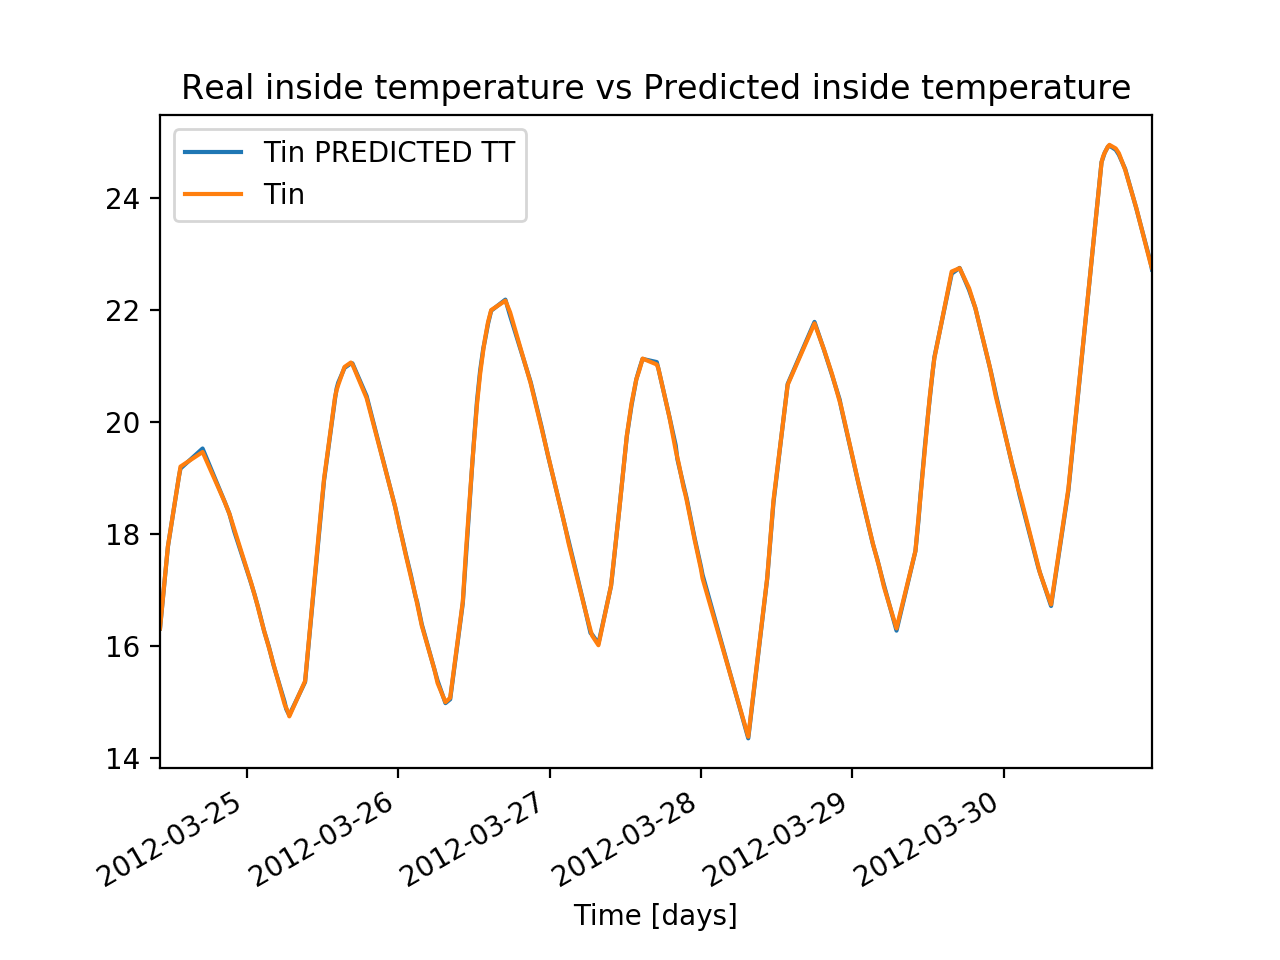

In [26]:
Predicted_DF_linearReg_split_sample = Predicted_DF_linearReg_split.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_split_sample.plot()
plt.xlabel("Time [days]")
#plt.ylabel("Temperature [°C]")
plt.title("Real inside temperature vs Predicted inside temperature")

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split= mean_absolute_error(Y_test,predicted_linearReg_split)
MSE_linearReg_split= mean_squared_error(Y_test,predicted_linearReg_split)
R2_linearReg_split = r2_score(Y_test,predicted_linearReg_split)
print("MAE test_train:"+str(MAE_linearReg_split))
print("MSE test_train:"+ str(MSE_linearReg_split))
print("R2 test_train:"+str(R2_linearReg_split))

MAE test_train:0.0218316047172
MSE test_train:0.000763878513002
R2 test_train:0.999863363013


### B) Cross Validation
#### We divide our data frame into 10 blocks

In [28]:
from sklearn.model_selection import cross_val_predict
predicted_linearReg_CV = cross_val_predict(linear_reg, DF_featurs, DF_target, cv=10)

In [29]:
Predicted_DF_linearReg_CV = pd.DataFrame(predicted_linearReg_CV, index= DF_target.index, columns=["Tin PREDICTED CV"])
# aggiungo colonna con risultati
Predicted_DF_linearReg_CV = Predicted_DF_linearReg_CV.join(DF_target)
Predicted_DF_linearReg_CV.head(24)

,Tin PREDICTED CV,Tin
2012-03-24 09:45:00,15.801021,15.7987
2012-03-24 10:00:00,16.047454,16.0407
2012-03-24 10:15:00,16.309864,16.3160
2012-03-24 10:30:00,16.591624,16.6040
2012-03-24 10:45:00,16.884520,16.8940
2012-03-24 11:00:00,17.185878,17.1960
2012-03-24 11:15:00,17.481036,17.4973
2012-03-24 11:30:00,17.767373,17.7807
2012-03-24 11:45:00,18.064172,18.0593
2012-03-24 12:00:00,18.276180,18.3313


<IPython.core.display.Javascript object>


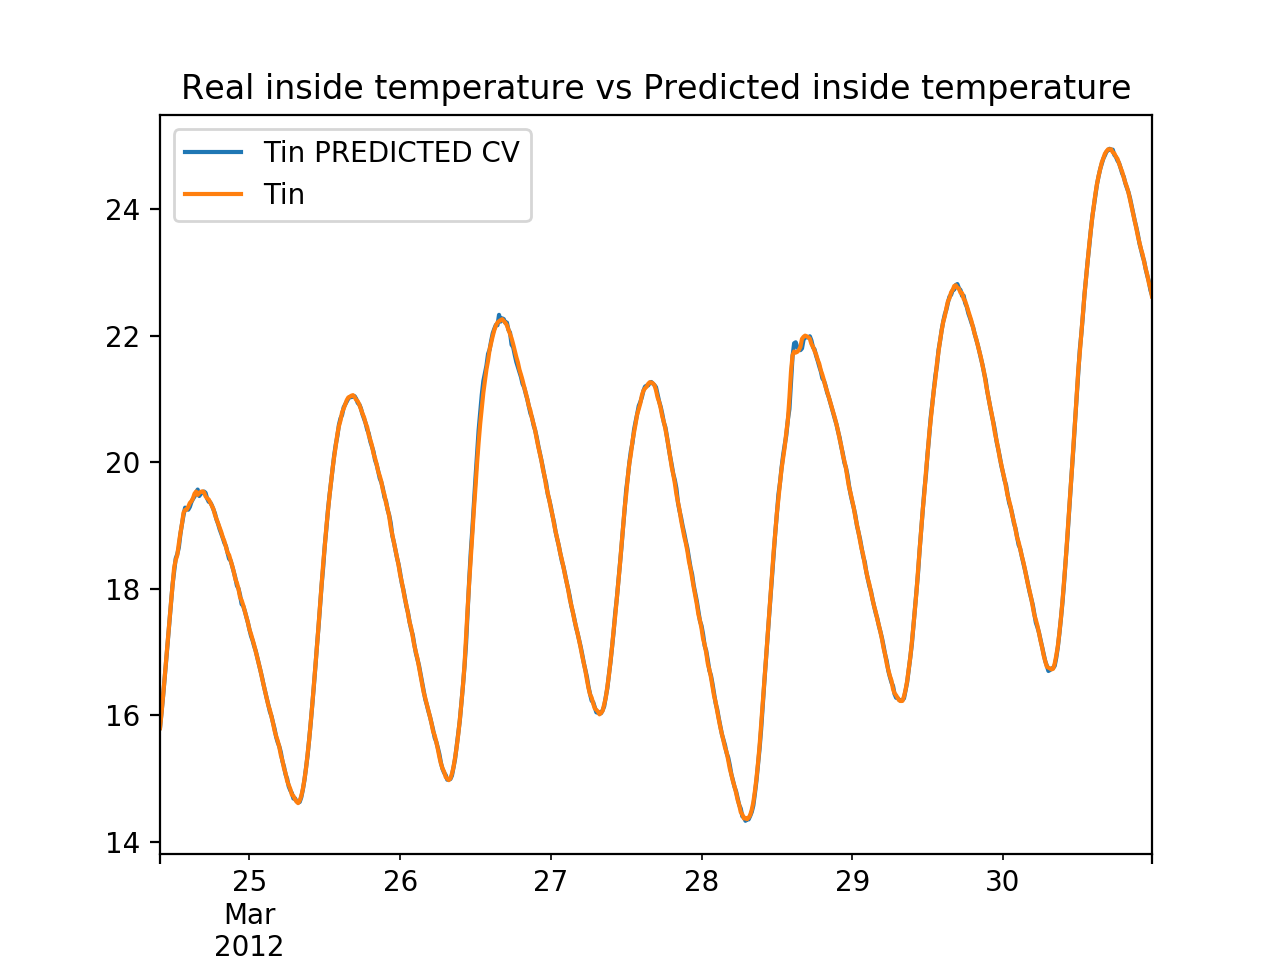

In [30]:
Predicted_DF_linearReg_CV_sample = Predicted_DF_linearReg_CV.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_CV_sample.plot()
plt.xlabel("Time [days]")
#plt.ylabel("Temperature [°C]")
plt.title("Real inside temperature vs Predicted inside temperature")

In [44]:
MAE_linearReg_CV= mean_absolute_error(DF_target,predicted_linearReg_CV)
MSE_linearReg_CV= mean_squared_error(DF_target,predicted_linearReg_CV)
R2_linearReg_CV = r2_score(DF_target,predicted_linearReg_CV)
print("MAE cross_validation:"+str(MAE_linearReg_CV))
print("MSE cross_validation:"+ str(MSE_linearReg_CV))
print("R2 cross_validation:"+str(R2_linearReg_CV))

MAE cross_validation:0.0226418336246
MSE cross_validation:0.00101180026992
R2 cross_validation:0.999812140471


### C) Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()

In [33]:
predicted_RF_reg_CV= cross_val_predict(RF_reg, DF_featurs, DF_target, cv=10)

/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [34]:
Predicted_DF_RF_Reg_CV = pd.DataFrame(predicted_RF_reg_CV, index= DF_target.index, columns=["Tin PREDICTED F"])
Predicted_DF_RF_Reg_CV = Predicted_DF_RF_Reg_CV.join(DF_target)
Predicted_DF_RF_Reg_CV.head(24)

,Tin PREDICTED F,Tin
2012-03-24 09:45:00,15.69086,15.7987
2012-03-24 10:00:00,15.91405,16.0407
2012-03-24 10:15:00,16.20892,16.3160
2012-03-24 10:30:00,16.48695,16.6040
2012-03-24 10:45:00,16.80427,16.8940
2012-03-24 11:00:00,17.12171,17.1960
2012-03-24 11:15:00,17.43660,17.4973
2012-03-24 11:30:00,17.62278,17.7807
2012-03-24 11:45:00,17.89318,18.0593
2012-03-24 12:00:00,18.20954,18.3313


<IPython.core.display.Javascript object>


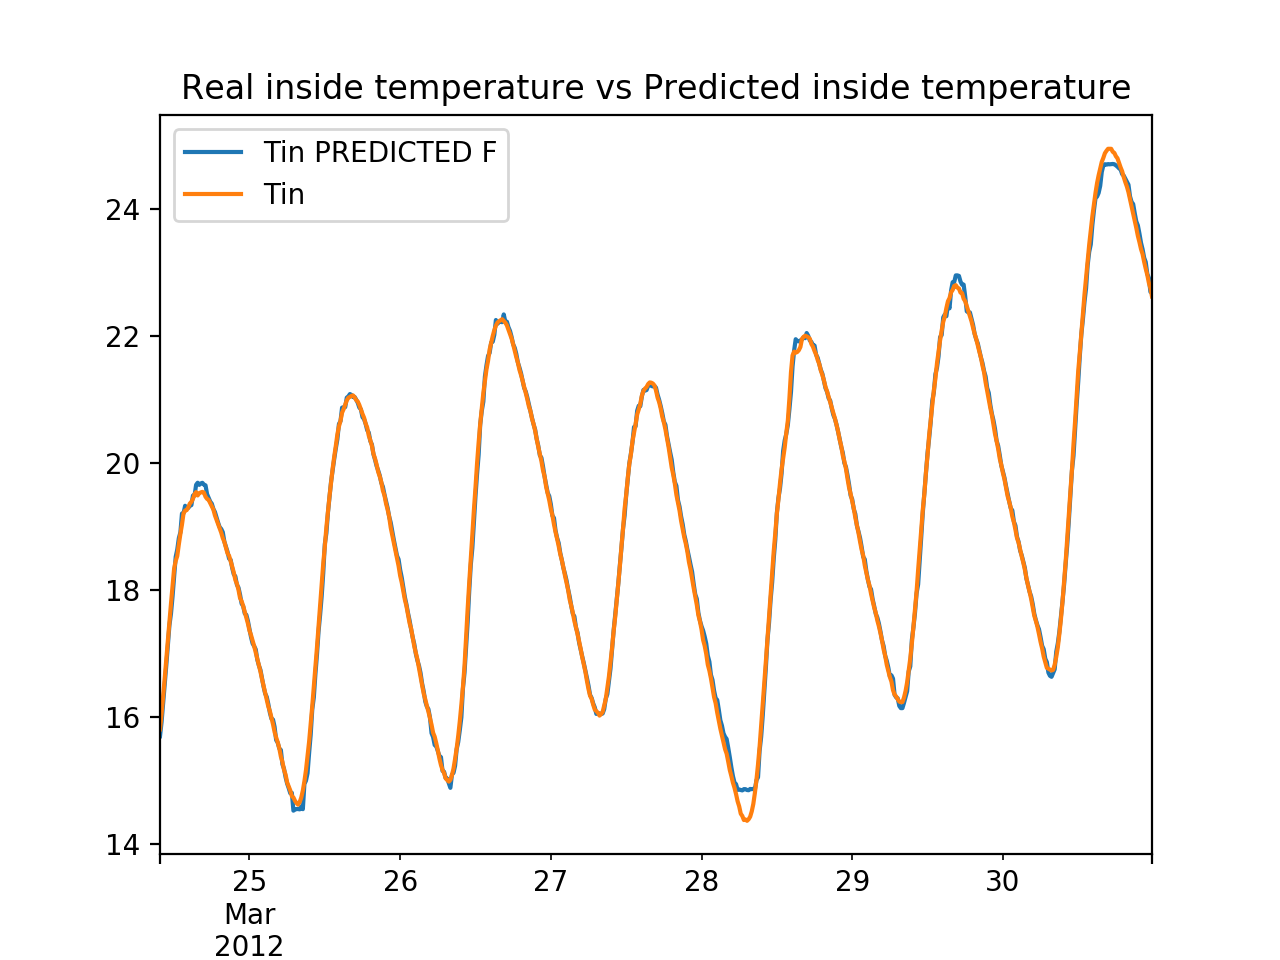

In [35]:
Predicted_DF_RF_Reg_CV_sample = Predicted_DF_RF_Reg_CV.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_RF_Reg_CV_sample.plot()
plt.xlabel("Time [days]")
#plt.ylabel("Temperature [°C]")
plt.title("Real inside temperature vs Predicted inside temperature")

In [43]:
MAE_RF_Reg_CV= mean_absolute_error(DF_target,predicted_RF_reg_CV)
MSE_RF_Reg_CV= mean_squared_error(DF_target,predicted_RF_reg_CV)
R2_RF_Reg_CV = r2_score(DF_target,predicted_RF_reg_CV)
print("MAE random_forest:"+ str(MAE_RF_Reg_CV))
print("MSE random_forest:"+ str(MSE_RF_Reg_CV))
print("R2 random_forest:"+ str(R2_RF_Reg_CV))

MAE random_forest:0.063117702048
MSE random_forest:0.0090942073241
R2 random_forest:0.998311491354


### D) Walk Forward

In [38]:
DF_online_prediction = pd.DataFrame(index=DATASET.index)
DF_online_prediction.head()

""
2012-03-24 09:45:00
2012-03-24 10:00:00
2012-03-24 10:15:00
2012-03-24 10:30:00
2012-03-24 10:45:00


In [39]:
FirstTimeStampMeasured = DATASET.index[0]
PeriodOfTraining = pd.Timedelta(5, unit="d")
FirstTimeStampToPredict = FirstTimeStampMeasured + PeriodOfTraining
LastTimeStampMeasured = DATASET.index[-1]
training_start_time_stamp = FirstTimeStampMeasured
training_end_time_stamp = FirstTimeStampToPredict - pd.Timedelta(15, unit="m")

In [40]:
FirstTimeStampToPredict

Timestamp('2012-03-29 09:45:00')

In [41]:
DF_online_prediction = DF_online_prediction.truncate(before = FirstTimeStampToPredict)
DF_online_prediction

""
2012-03-29 09:45:00
2012-03-29 10:00:00
2012-03-29 10:15:00
2012-03-29 10:30:00
2012-03-29 10:45:00
2012-03-29 11:00:00
2012-03-29 11:15:00
2012-03-29 11:30:00
2012-03-29 11:45:00
2012-03-29 12:00:00


In [42]:
time_stamp_to_predict = FirstTimeStampToPredict
while (time_stamp_to_predict <= LastTimeStampMeasured):
    DF_features_train = DF_featurs.truncate(before=training_start_time_stamp,after=training_end_time_stamp)
    DF_target_train = DF_target.truncate(before=training_start_time_stamp,after=training_end_time_stamp)
    DF_features_test = DF_featurs.loc[time_stamp_to_predict,:].values.reshape(1,-1)
    DF_target_test = DF_target.loc[time_stamp_to_predict,"Tin"]
  #let's train
    RF_reg.fit(DF_features_train, DF_target_train)
    predicted_consumption = RF_reg.predict(DF_features_test)
    DF_online_prediction.loc[time_stamp_to_predict,"Predicted"] = predicted_consumption
    DF_online_prediction.loc[time_stamp_to_predict,"Real"] = DF_target_test
    time_stamp_to_predict = time_stamp_to_predict + pd.Timedelta(15, unit="m")
    training_start_time_stamp = training_start_time_stamp + pd.Timedelta(15, unit="m")
    training_end_time_stamp = training_end_time_stamp + pd.Timedelta(15, unit="m")

/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [46]:
MAE_WF= mean_absolute_error(DF_online_prediction[["Real"]],DF_online_prediction[["Predicted"]])
MSE_WF= mean_squared_error(DF_online_prediction[["Real"]],DF_online_prediction[["Predicted"]])
R2_WF = r2_score(DF_online_prediction[["Real"]],DF_online_prediction[["Predicted"]])
print("MAE walk_forward:"+ str(MAE_WF))
print("MSE walk_forward:"+ str(MSE_WF))
print("R2 walk_forward:"+ str(R2_WF))

MAE walk_forward:0.0963527124172
MSE walk_forward:0.017225386572
R2 walk_forward:0.996511156902


#### Create a table containing the differents methods and their relative errors

In [47]:
column_name = ["MAE","MSE","R2"]
index_name = ["Test Train","Cross Validation","Random Forest", "Walk Forward"]
test_train_errors = [MAE_linearReg_split,MSE_linearReg_split,R2_linearReg_split]
cross_validation_errors = [MAE_linearReg_CV,MSE_linearReg_CV,R2_linearReg_CV]
random_forest_errors = [MAE_RF_Reg_CV,MSE_RF_Reg_CV,R2_RF_Reg_CV]
walk_forward_errors = [MAE_WF,MSE_WF,R2_WF]
errors_list = [test_train_errors,cross_validation_errors,random_forest_errors,walk_forward_errors]
errors_data_frame = pd.DataFrame(errors_list, index=index_name, columns=column_name)

errors_data_frame

,MAE,MSE,R2
Test Train,0.021832,0.000764,0.999863
Cross Validation,0.022642,0.001012,0.999812
Random Forest,0.063118,0.009094,0.998311
Walk Forward,0.096353,0.017225,0.996511


In [48]:
path_table_errors = os.path.join(Project_folder,"errors.csv")
errors_data_frame.to_csv(path_table_errors, sep=";")

## Step 2) Predict T_in in the next hour

#### To do this we drop from the main data frame the columns related to Tin lagged 

In [81]:
DATASET.columns

Index([u'Tin', u'Tout', u'Sun', u'CO2', u'Humidity', u'Light', u'hour', u'min',
       u'sin(hour)', u'cos(hour)', u'sin(min)', u'cos(min)', u'month',
       u'dayOfWeek', u'weekOfYear', u'WeekendLabel', u'WorkingHourLabel',
       u'Tout -1h/4', u'Tout -2h/4', u'Tout -3h/4', u'Tout -4h/4',
       u'Tout -5h/4', u'Tout -6h/4', u'Tout -7h/4', u'Tout -8h/4',
       u'Tout -9h/4', u'Tout -10h/4', u'Tout -11h/4', u'Tout -12h/4',
       u'Tout -13h/4', u'Tout -14h/4', u'Tout -15h/4', u'Tout -16h/4',
       u'Sun -15h/4', u'Sun -16h/4', u'Sun -17h/4', u'Sun -18h/4',
       u'Sun -19h/4', u'Sun -20h/4', u'Sun -21h/4', u'Sun -22h/4',
       u'Sun -23h/4', u'Sun -24h/4', u'Sun -25h/4', u'Sun -26h/4',
       u'Sun -27h/4', u'Sun -28h/4', u'Sun -29h/4', u'Sun -30h/4',
       u'CO2 -10h/4', u'CO2 -11h/4', u'CO2 -12h/4', u'CO2 -13h/4',
       u'CO2 -14h/4', u'CO2 -15h/4', u'CO2 -16h/4', u'CO2 -17h/4',
       u'CO2 -18h/4', u'CO2 -19h/4', u'CO2 -20h/4', u'CO2 -21h/4',
       u'CO2 -22h/4', u'CO2 -23

In [53]:
dataset_1 = DATASET.drop(["Tin -1h/4","Tin -2h/4","Tin -3h/4","Tin -4h/4"],axis=1)

In [54]:
dataset_1.columns

Index([u'Tin', u'Tout', u'Sun', u'CO2', u'Humidity', u'Light', u'hour', u'min',
       u'sin(hour)', u'cos(hour)', u'sin(min)', u'cos(min)', u'month',
       u'dayOfWeek', u'weekOfYear', u'WeekendLabel', u'WorkingHourLabel',
       u'Tout -1h/4', u'Tout -2h/4', u'Tout -3h/4', u'Tout -4h/4',
       u'Tout -5h/4', u'Tout -6h/4', u'Tout -7h/4', u'Tout -8h/4',
       u'Tout -9h/4', u'Tout -10h/4', u'Tout -11h/4', u'Tout -12h/4',
       u'Tout -13h/4', u'Tout -14h/4', u'Tout -15h/4', u'Tout -16h/4',
       u'Sun -15h/4', u'Sun -16h/4', u'Sun -17h/4', u'Sun -18h/4',
       u'Sun -19h/4', u'Sun -20h/4', u'Sun -21h/4', u'Sun -22h/4',
       u'Sun -23h/4', u'Sun -24h/4', u'Sun -25h/4', u'Sun -26h/4',
       u'Sun -27h/4', u'Sun -28h/4', u'Sun -29h/4', u'Sun -30h/4',
       u'CO2 -10h/4', u'CO2 -11h/4', u'CO2 -12h/4', u'CO2 -13h/4',
       u'CO2 -14h/4', u'CO2 -15h/4', u'CO2 -16h/4', u'CO2 -17h/4',
       u'CO2 -18h/4', u'CO2 -19h/4', u'CO2 -20h/4', u'CO2 -21h/4',
       u'CO2 -22h/4', u'CO2 -23

In [55]:
DF_target_1 = dataset_1.loc[:,["Tin"]]
DF_featurs_1 = dataset_1.drop("Tin",axis=1)

### A) Train-Test splitting

#### We decide that the test size will be the 20% of the train size but the row are chosen randomly

In [56]:
from sklearn.model_selection import train_test_split 
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(DF_featurs_1, DF_target_1, test_size=0.2, random_state=41234)

In [57]:
from sklearn import linear_model
linear_reg_1 = linear_model.LinearRegression()
print(linear_reg_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [58]:
linear_reg_1.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
predicted_linearReg_split_1 = linear_reg_1.predict(X_test_1)

In [60]:
Predicted_DF_linearReg_split_1 = pd.DataFrame(predicted_linearReg_split_1, index= Y_test_1.index, columns=["Tin predicted test_train"])
Predicted_DF_linearReg_split_1 = Predicted_DF_linearReg_split_1.join(Y_test_1)
Predicted_DF_linearReg_split_1.head(50)

,Tin predicted test_train,Tin
2012-04-05 02:15:00,18.242432,18.2400
2012-04-05 21:30:00,19.714765,19.7767
2012-04-03 13:30:00,21.833917,21.7800
2012-03-31 20:30:00,22.388987,22.4133
2012-03-28 19:30:00,21.184847,21.2933
2012-04-07 02:15:00,16.377917,16.3260
2012-04-01 23:15:00,21.361415,21.3680
2012-03-26 10:15:00,16.736953,16.7960
2012-04-07 22:45:00,18.179710,18.1880
2012-03-27 20:00:00,19.662108,19.4933


<IPython.core.display.Javascript object>


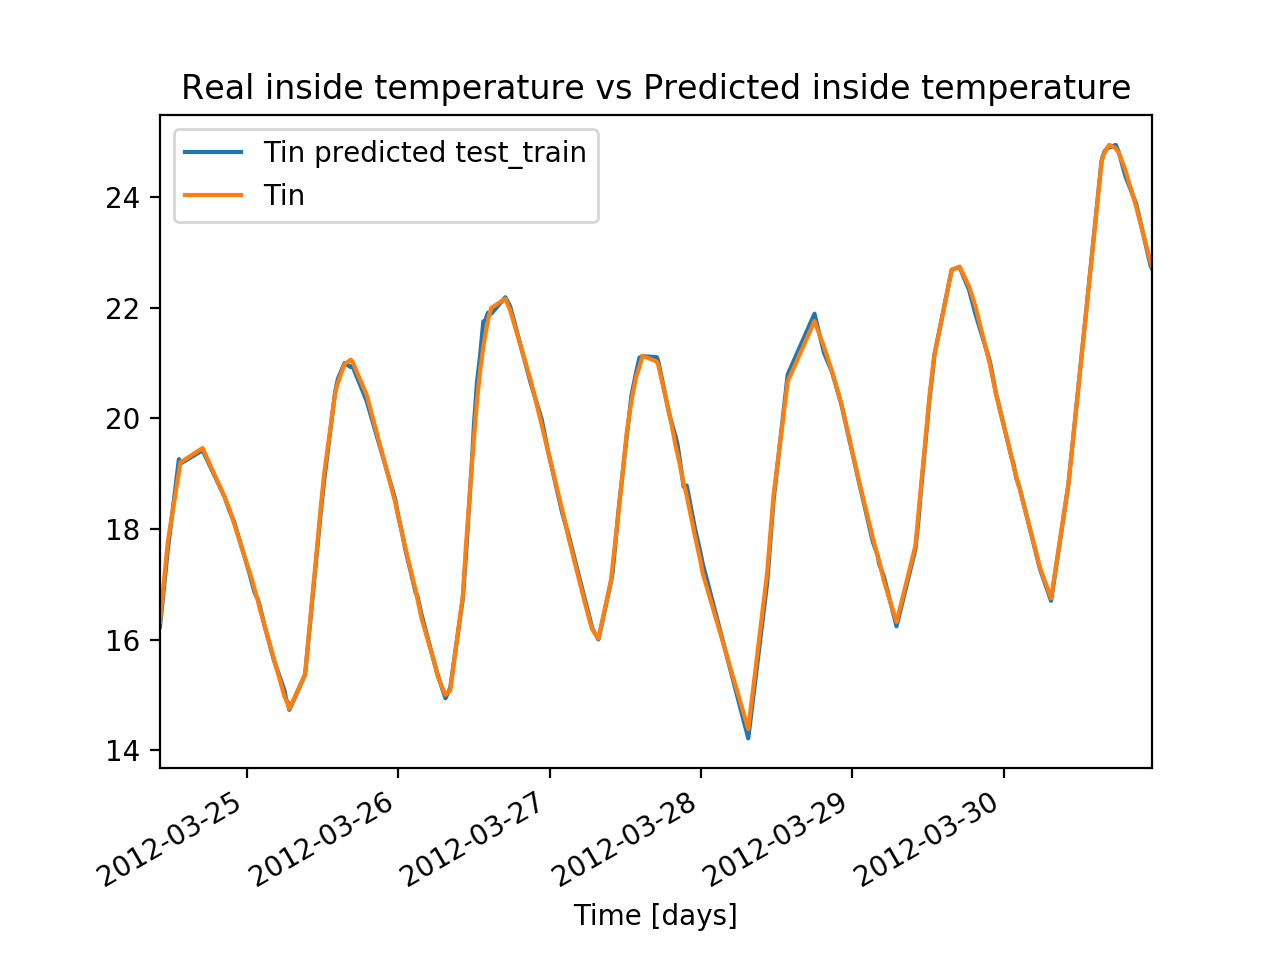

In [61]:
Predicted_DF_linearReg_split_sample_1 = Predicted_DF_linearReg_split_1.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_split_sample_1.plot()
plt.xlabel("Time [days]")
#plt.ylabel("Temperature [°C]")
plt.title("Real inside temperature vs Predicted inside temperature")

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split_1= mean_absolute_error(Y_test_1,predicted_linearReg_split_1)
MSE_linearReg_split_1= mean_squared_error(Y_test_1,predicted_linearReg_split_1)
R2_linearReg_split_1 = r2_score(Y_test_1,predicted_linearReg_split_1)
print("MAE test_train:"+str(MAE_linearReg_split_1))
print("MSE test_train:"+ str(MSE_linearReg_split_1))
print("R2 test_train:"+str(R2_linearReg_split_1))

MAE test_train:0.0672070355561
MSE test_train:0.00932875770607
R2 test_train:0.99833134023


### B) Cross Validation
#### We divide our data frame into 10 blocks

In [63]:
from sklearn.model_selection import cross_val_predict
predicted_linearReg_CV_1 = cross_val_predict(linear_reg_1, DF_featurs_1, DF_target_1, cv=10)

In [64]:
Predicted_DF_linearReg_CV_1 = pd.DataFrame(predicted_linearReg_CV_1, index= DF_target_1.index, columns=["Tin predicted CV"])
Predicted_DF_linearReg_CV_1 = Predicted_DF_linearReg_CV_1.join(DF_target_1)
Predicted_DF_linearReg_CV_1.head(24)

,Tin predicted CV,Tin
2012-03-24 09:45:00,15.753434,15.7987
2012-03-24 10:00:00,15.974400,16.0407
2012-03-24 10:15:00,16.210006,16.3160
2012-03-24 10:30:00,16.455357,16.6040
2012-03-24 10:45:00,16.756221,16.8940
2012-03-24 11:00:00,17.077840,17.1960
2012-03-24 11:15:00,17.327313,17.4973
2012-03-24 11:30:00,17.599833,17.7807
2012-03-24 11:45:00,17.980796,18.0593
2012-03-24 12:00:00,18.043247,18.3313


<IPython.core.display.Javascript object>


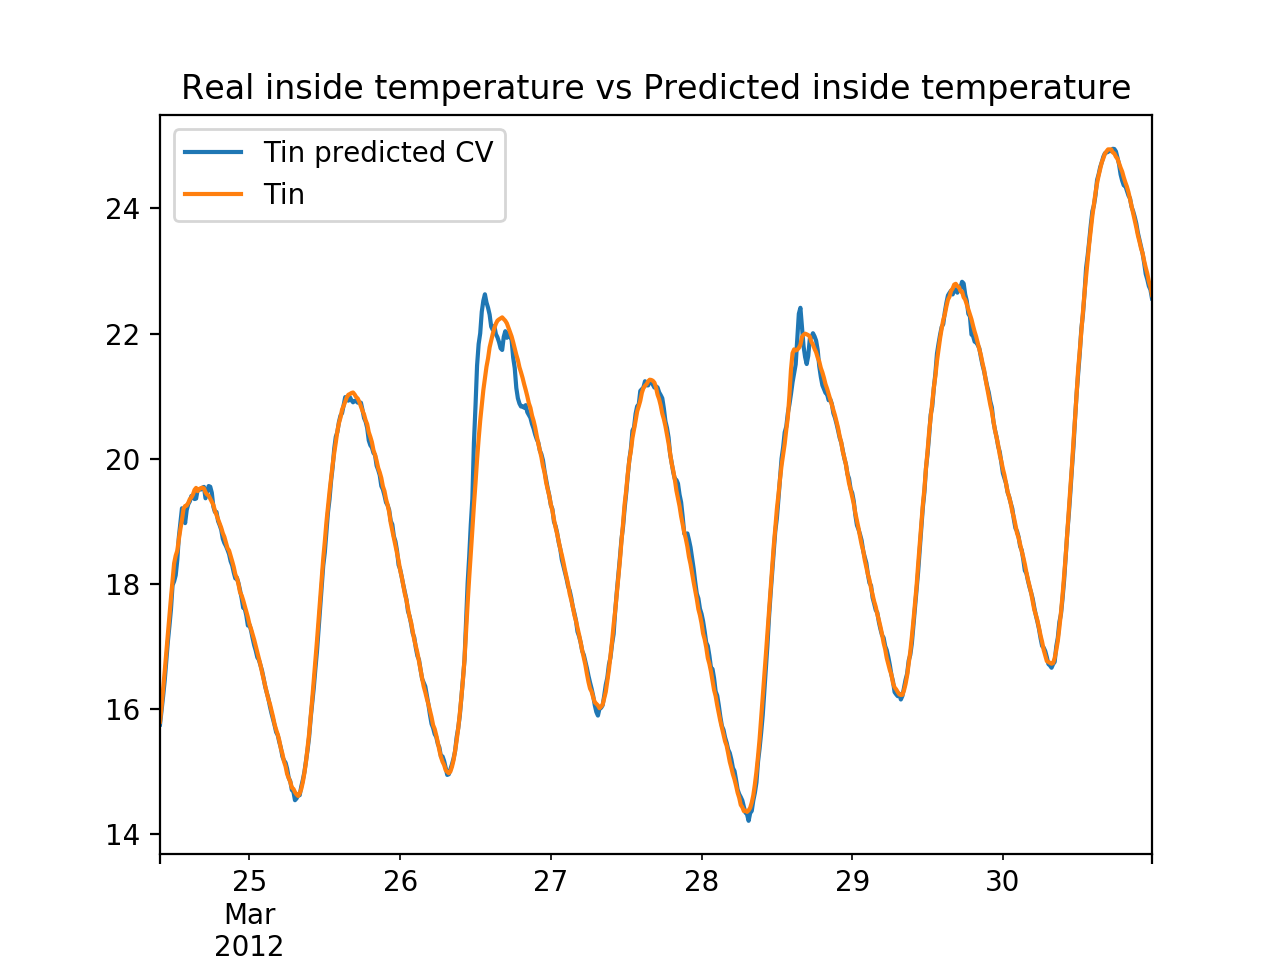

In [65]:
Predicted_DF_linearReg_CV_sample_1 = Predicted_DF_linearReg_CV_1.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_linearReg_CV_sample_1.plot()
plt.xlabel("Time [days]")
#plt.ylabel("Temperature [°C]")
plt.title("Real inside temperature vs Predicted inside temperature")

In [83]:
MAE_linearReg_CV_1 = mean_absolute_error(DF_target_1,predicted_linearReg_CV_1)
MSE_linearReg_CV_1 = mean_squared_error(DF_target_1,predicted_linearReg_CV_1)
R2_linearReg_CV_1 = r2_score(DF_target_1,predicted_linearReg_CV_1)
print("MAE cross_validation:"+str(MAE_linearReg_CV_1))
print("MSE cross_validation:"+ str(MSE_linearReg_CV_1))
print("R2 cross_validation:"+str(R2_linearReg_CV_1))

MAE cross_validation:0.0837460654204
MSE cross_validation:0.0226339377799
R2 cross_validation:0.995797588699


### C) Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF_reg_1 = RandomForestRegressor()

In [68]:
predicted_RF_reg_CV_1= cross_val_predict(RF_reg_1, DF_featurs_1, DF_target_1, cv=10)

In [69]:
Predicted_DF_RF_Reg_CV_1 = pd.DataFrame(predicted_RF_reg_CV_1, index= DF_target_1.index, columns=["Tin predicted RF"])
Predicted_DF_RF_Reg_CV_1 = Predicted_DF_RF_Reg_CV_1.join(DF_target_1)
Predicted_DF_RF_Reg_CV_1.head(24)

,Tin predicted RF,Tin
2012-03-24 09:45:00,15.78320,15.7987
2012-03-24 10:00:00,15.85820,16.0407
2012-03-24 10:15:00,16.34513,16.3160
2012-03-24 10:30:00,16.50954,16.6040
2012-03-24 10:45:00,16.50746,16.8940
2012-03-24 11:00:00,17.05986,17.1960
2012-03-24 11:15:00,17.16294,17.4973
2012-03-24 11:30:00,17.32561,17.7807
2012-03-24 11:45:00,17.85134,18.0593
2012-03-24 12:00:00,17.75820,18.3313


<IPython.core.display.Javascript object>


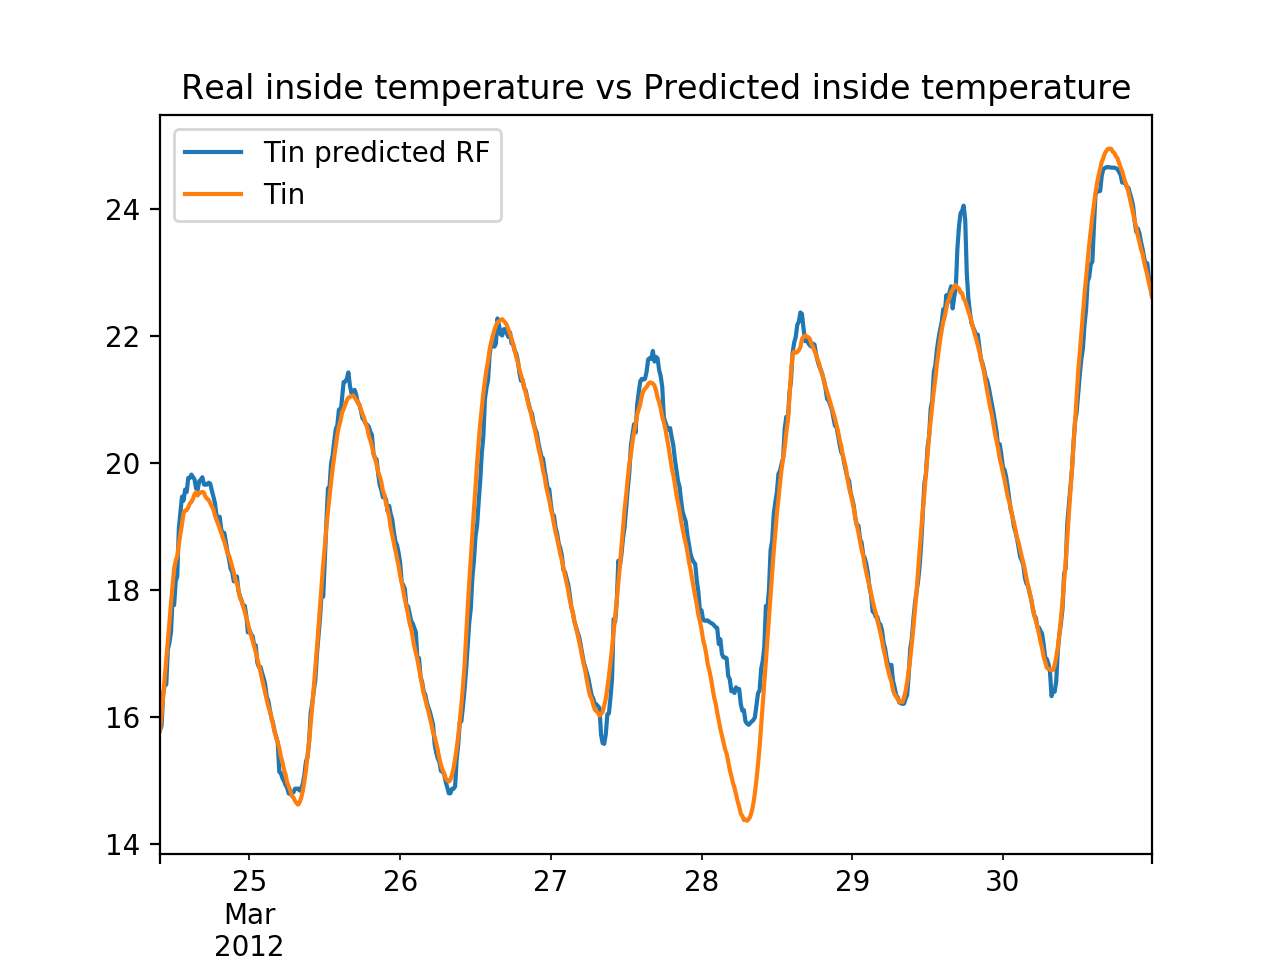

In [80]:
Predicted_DF_RF_Reg_CV_sample_1 = Predicted_DF_RF_Reg_CV_1.loc["2012-03-19":"2012-03-30",:]
Predicted_DF_RF_Reg_CV_sample_1.plot()
plt.xlabel("Time [days]")
#plt.ylabel("Temperature [°C]")
plt.title("Real inside temperature vs Predicted inside temperature")

In [84]:
MAE_RF_Reg_CV_1 = mean_absolute_error(DF_target_1,predicted_RF_reg_CV_1)
MSE_RF_Reg_CV_1 = mean_squared_error(DF_target_1,predicted_RF_reg_CV_1)
R2_RF_Reg_CV_1 = r2_score(DF_target_1,predicted_RF_reg_CV_1)
print("MAE random_forest:"+ str(MAE_RF_Reg_CV_1))
print("MSE random_forest:"+ str(MSE_RF_Reg_CV_1))
print("R2 random_forest:"+ str(R2_RF_Reg_CV_1))

MAE random_forest:0.228880712413
MSE random_forest:0.126129388751
R2 random_forest:0.976581734302


### D) Walk Forward

In [72]:
DF_online_prediction_1 = pd.DataFrame(index=dataset_1.index)
DF_online_prediction_1.head()

""
2012-03-24 09:45:00
2012-03-24 10:00:00
2012-03-24 10:15:00
2012-03-24 10:30:00
2012-03-24 10:45:00


In [73]:
FirstTimeStampMeasured_1 = dataset_1.index[0]
PeriodOfTraining_1 = pd.Timedelta(5, unit="d")
FirstTimeStampToPredict_1 = FirstTimeStampMeasured_1 + PeriodOfTraining_1
LastTimeStampMeasured_1 = dataset_1.index[-1]
training_start_time_stamp_1 = FirstTimeStampMeasured_1
training_end_time_stamp_1 = FirstTimeStampToPredict_1 - pd.Timedelta(15, unit="m")

In [74]:
DF_online_prediction_1 = DF_online_prediction_1.truncate(before = FirstTimeStampToPredict_1)
DF_online_prediction_1.head()

""
2012-03-29 09:45:00
2012-03-29 10:00:00
2012-03-29 10:15:00
2012-03-29 10:30:00
2012-03-29 10:45:00


In [75]:
time_stamp_to_predict_1 = FirstTimeStampToPredict_1
while (time_stamp_to_predict_1 <= LastTimeStampMeasured_1):
    DF_features_train_1 = DF_featurs_1.truncate(before=training_start_time_stamp_1,after=training_end_time_stamp_1)
    DF_target_train_1 = DF_target_1.truncate(before=training_start_time_stamp_1,after=training_end_time_stamp_1)
    DF_features_test_1 = DF_featurs_1.loc[time_stamp_to_predict_1,:].values.reshape(1,-1)
    DF_target_test_1 = DF_target_1.loc[time_stamp_to_predict_1,"Tin"]
  #let's train
    RF_reg_1.fit(DF_features_train_1, DF_target_train_1)
    predicted_consumption_1 = RF_reg_1.predict(DF_features_test_1)
    DF_online_prediction_1.loc[time_stamp_to_predict_1,"Predicted"] = predicted_consumption_1
    DF_online_prediction_1.loc[time_stamp_to_predict_1,"Real"] = DF_target_test_1
    time_stamp_to_predict_1 = time_stamp_to_predict_1 + pd.Timedelta(15, unit="m")
    training_start_time_stamp_1 = training_start_time_stamp_1 + pd.Timedelta(15, unit="m")
    training_end_time_stamp_1 = training_end_time_stamp_1 + pd.Timedelta(15, unit="m")

/Users/giuliamoret/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [76]:
DF_online_prediction_1

,Predicted,Real
2012-03-29 09:45:00,17.071140,17.4147
2012-03-29 10:00:00,17.234175,17.6987
2012-03-29 10:15:00,17.799270,17.9640
2012-03-29 10:30:00,17.888270,18.3093
2012-03-29 10:45:00,18.458650,18.6247
2012-03-29 11:00:00,18.708930,18.9360
2012-03-29 11:15:00,18.929140,19.2667
2012-03-29 11:30:00,19.483730,19.5187
2012-03-29 11:45:00,19.659080,19.8500
2012-03-29 12:00:00,19.818000,20.1200


In [77]:
MAE_WF_1= mean_absolute_error(DF_online_prediction_1[["Real"]],DF_online_prediction_1[["Predicted"]])
MSE_WF_1= mean_squared_error(DF_online_prediction_1[["Real"]],DF_online_prediction_1[["Predicted"]])
R2_WF_1 = r2_score(DF_online_prediction_1[["Real"]],DF_online_prediction_1[["Predicted"]])
print("MAE walk_forward:"+ str(MAE_WF_1))
print("MSE walk_forward:"+ str(MSE_WF_1))
print("R2 walk_forward:"+ str(R2_WF_1))

MAE walk_forward:0.235216200936
MSE walk_forward:0.111428149375
R2 walk_forward:0.977431256577


#### Create a table containing the differents methods and their relative errors

In [78]:
column_name = ["MAE","MSE","R2"]
index_name = ["Test Train","Cross Validation","Random Forest", "Walk Forward"]
test_train_errors_1 = [MAE_linearReg_split_1,MSE_linearReg_split_1,R2_linearReg_split_1]
cross_validation_errors_1 = [MAE_linearReg_CV_1,MSE_linearReg_CV_1,R2_linearReg_CV_1]
random_forest_errors_1 = [MAE_RF_Reg_CV_1,MSE_RF_Reg_CV_1,R2_RF_Reg_CV_1]
walk_forward_errors_1 = [MAE_WF_1,MSE_WF_1,R2_WF_1]
errors_list_1 = [test_train_errors_1,cross_validation_errors_1,random_forest_errors_1,walk_forward_errors_1]
errors_data_frame_1 = pd.DataFrame(errors_list_1, index=index_name, columns=column_name)

errors_data_frame_1

,MAE,MSE,R2
Test Train,0.067207,0.009329,0.998340
Cross Validation,0.083746,0.022634,0.995796
Random Forest,0.228881,0.126129,0.975506
Walk Forward,0.235216,0.111428,0.977431


In [79]:
path_table_errors_1 = os.path.join(Project_folder,"errors_1hour.csv")
errors_data_frame_1.to_csv(path_table_errors_1, sep=";")